In [1]:
import random

from scipy import stats
from scipy.stats import ttest_ind
import scipy.stats as st

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
filename = "dataDescriptiveStatistics.csv"

In [3]:
df = pd.read_csv(filename, sep=';')
gen = [random.randint(int(df['Distance'].min()), int(df['Distance'].max())) for _ in range(0, df.shape[0])]
gen.sort()
df['GenDistance'] = gen
df['Gender'] = [random.choice([0, 1]) for _ in range(0, df.shape[0])]
df['Class'] = [random.choice(['art', 'music', 'math']) for _ in range(0, df.shape[0])] 
df.head()

,Distance,Class,GenDistance,Gender
0,693.187252,music,699,0
1,695.476117,math,704,1
2,808.722787,art,719,1
3,862.737524,music,783,1
4,894.073869,art,828,0


In [ ]:
# данные: номинальные (базовые, группы), порядковые, интервальные

# номинальные: не применимы способы расчета метрические (станд.откл, среднее и тд)
# порядковые: (должны быть равного порядка)
# интервальные: все возможные статистики

# Базовые статистики

In [5]:
# определение кол-ва интервалов

# по кол-ву интервалом (простые)
# метод Стеджеса
def studges(n):
    return 1 + np.log(n)

def smpl(n):
    return np.sqrt(n)

# по ширине
# метод Скотта
def scott(n: np.array):
    std = np.std(n)
    return 3.5 * (std / np.power(len(n), 1./3))
    
# Метод Фридмана - Диакониса 
def fdm(n: np.array):
    return (2*3.14) / np.power(len(n), 1./3)

# Статистические критерии

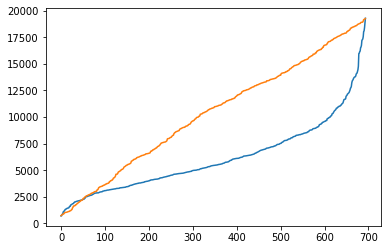

In [6]:
plt.plot(df['Distance'])
plt.plot(df['GenDistance'])

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GenDistance', ylabel='Density'>

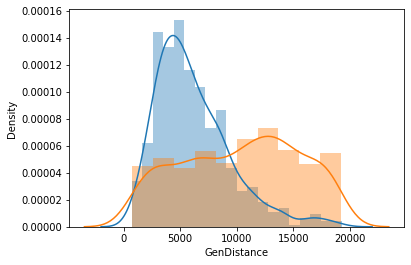

In [7]:
sns.distplot(df['Distance'])
sns.distplot(df['GenDistance'])

In [7]:
# сделать проверку на нормальное или экспоненциальное распределение !!!!!!!!!!!

In [8]:
# Свойства статистического критерия
# - применим для данной ситуации
# - мощность критерия (1-B)
# - состоятельность критерия (1-B стремится к 1)
# - не смещенность (1-B > a)

In [9]:
# алгоритм проверки (по критерию)
# 1 - определяем уровень значимости
# 2 - считаем значение t для уровня значимости из шага 1
# 3 - считаем по выборке статистику критерия (если T(выборка)>t или T(выборка)<t, то отвергаем гипотезу 0)

In [10]:
# алгоритм проверки (c p-value)
# 1 - определяем уровень значимости
# 2 - считаем значение статистики
# 3 - считаем уровень значимости критерия
# 4 - сравниваем, если p < a, то отвергаем 0 гипотезу

In [11]:
# метод Монте-Карло
# 1 - формулируем гипотезу 0
# 2 - выбираем кретерий со статистикой
# 3 - моделируем выборку данных
# 4 - считаем статистику (повторяем шаги 3 - 4 много раз)

### критические значения

In [8]:
# Gaussian Percent Point Function
from scipy.stats import norm
# define probability
p = 0.95
# retrieve value <= probability
value = norm.ppf(p)
print(value)
# confirm with cdf
p = norm.cdf(value)
print(p)

1.6448536269514722
0.95


In [9]:
# Student t-distribution Percent Point Function
from scipy.stats import t
# define probability
p = 0.95
df = 10
# retrieve value <= probability
value = t.ppf(p, df)
print(value)
# confirm with cdf
p = t.cdf(value, df)
print(p)

1.8124611228107335
0.949999999999923


In [10]:
# Chi-Squared Percent Point Function
from scipy.stats import chi2
# define probability
p = 0.95
df = 10
# retrieve value <= probability
value = chi2.ppf(p, df)
print(value)
# confirm with cdf
p = chi2.cdf(value, df)
print(p)

18.307038053275146
0.95


## p-value test

In [12]:
df = pd.read_csv(filename, sep=';')
gen = [random.randint(int(df['Distance'].min()), int(df['Distance'].max())) for _ in range(0, df.shape[0])]
gen.sort()
df['GenDistance'] = gen
df['Gender'] = [random.choice([0, 1]) for _ in range(0, df.shape[0])]
df['Class'] = [random.choice(['art', 'music', 'math']) for _ in range(0, df.shape[0])] 

In [13]:
# определяем размер и данные
N = df.shape[0]
a = df['Distance'].values
b = df['GenDistance'].values

# Расчет стандартного отклонения и вариации
# var
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

# std (между a и b)
s = np.sqrt((var_a + var_b)/2)

# расчет t - статистики
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

# расчет уровней свободы
deegrfreed = 2*N - 2

#p-value после сравнения с t
p = 1 - 0.000001 if stats.t.cdf(t, df=deegrfreed) < 0.000001 else stats.t.cdf(t, df=deegrfreed)

print("t = ", t)
print("p = ", 2*p)
print("p-value is ", 2 * 0.95 <= 2*p)

## расчет через функцию из либы
t2, p2 = stats.ttest_ind(a,b)
print("t = ", t2)
print("p = ", p2)
print("p-value is ", 2 * 0.05 >= 2*p2)


t =  -16.268290121865796
p =  1.999998
p-value is  True
t =  -16.268290121865796
p =  1.3568287360310254e-54
p-value is  True


## Гипотеза согласия ( распределение пренадлежит распределению - Х)

Критерии оценки:
    - общие (для любых законов распределения):
        - согласия Хи-квадрад
        - Колмогорова-Смирнова
        - Андерсена-Дарлинга
        - Крамера-Мизоса-Смирнова
    - специальные (нормальность):
        - Шапиро-Уилка
    

### хи-квадрад

In [37]:
# 1 - разбиваем область на интервалы(k)
# 2 - считаем кол-во наблюдений в каждом интервале (ni)
# 3 - считаем частоту попадания в каждый интервал(ni/n)
# 4 - считаем теоритическую вероятность попадания ni в интервалы

In [20]:
df.head()

,Distance,Class,GenDistance,Gender
0,693.187252,math,697,0
1,695.476117,math,834,1
2,808.722787,music,841,0
3,862.737524,music,876,0
4,894.073869,art,944,1


In [21]:
tbl = df.pivot_table(index=['Gender',], columns=['Class',], values='GenDistance', aggfunc='mean')
tbl

Class,art,math,music
Gender,,,
0,10398.429752,9518.644231,10116.319328
1,8937.598291,10083.754237,9698.634783


If Statistic >= Critical Value (If p-value <= alpha): значимость есть, отвергаем H0, есть зависимость 

If Statistic < Critical Value (If p-value > alpha): значимости нет, не отвегаем H0, независимые

------------------------
degrees of freedom: (rows - 1) * (cols - 1)

In [22]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# таблицу в матрицу
table = tbl.values

# chi2
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print('p=%d' % p)

# test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

#  p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))

if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
p=0
probability=0.950, critical=5.991, stat=106.154
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Колмогорова-Смирнова

In [ ]:
# описывает расстояние между теоритической функции и эмперической (имеет наименьшую мощьность)
# 1 - строим теоритическую функцию, которую хотим видеть в данных
# 2 - строим функцию распределения по фактическим данным
# 3 - считаем расстояния между фактической функцией и теоритической

In [23]:
df.head()

,Distance,Class,GenDistance,Gender
0,693.187252,math,697,0
1,695.476117,math,834,1
2,808.722787,music,841,0
3,862.737524,music,876,0
4,894.073869,art,944,1


In [25]:
# берем средние
g1 = df['Distance'].mean()
g2 = df['GenDistance'].mean()
print(g1, g2)

6143.467926097422 9802.472622478386


In [30]:
stat, p =ttest_ind(df['Distance'].values, df['GenDistance'].values, equal_var=False)

if p >= 0.05:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

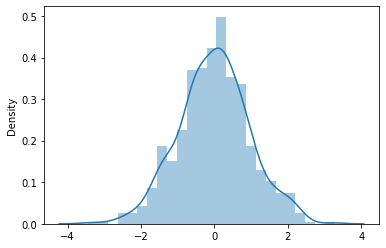

In [44]:
# генерим базовые распределения
norm_dist = np.random.normal(0, 1.0, size=df.shape[0])
sns.distplot(norm_dist)

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

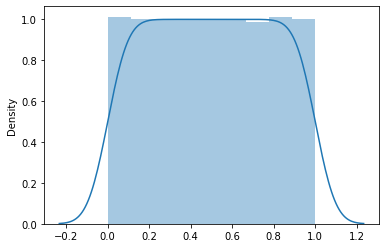

In [45]:
exp_dist = np.arange(1/len(norm_dist), 1+1/len(norm_dist), 1/len(norm_dist))
sns.distplot(exp_dist)

In [52]:
#sort
arr_1_sorted = np.sort(df['Distance'])
#get cdf based on norm distribution
cdf_null_hyp = [st.norm.cdf(x) for x in arr_1_sorted]

In [53]:
#calculate absolute difference
arr_dif_abs = np.abs(cdf_null_hyp - exp_dist)
#get max different
dn_ks = max(arr_dif_abs)
dn_ks

0.9985590778097982

In [54]:
dn_crit = 1.36/np.sqrt(len(exp_dist))
dn_crit

0.05162489402407639

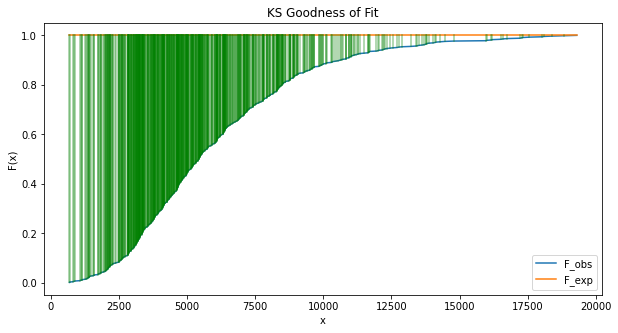

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(arr_1_sorted, exp_dist, label='F_obs')
plt.plot(arr_1_sorted, cdf_null_hyp, label='F_exp')
for x, y1, y2 in zip(arr_1_sorted, exp_dist, cdf_null_hyp):
    plt.plot([x, x], [y1, y2], color='green', alpha=0.4)
plt.legend()
plt.ylabel("F(x)")
plt.xlabel('x')
plt.title("KS Goodness of Fit")
plt.show()

In [ ]:
# для 2х семплов

In [56]:
x_y = np.sort(np.concatenate((df['Distance'].values, df['GenDistance'].values)))
x_y

array([  693.18725199,   695.47611729,   697.        , ...,
       19279.        , 19284.        , 19293.82760054])

In [62]:
x_cdf = [np.round(st.percentileofscore(df['Distance'].values, samp)/100, 1) for samp in x_y]
y_cdf = [np.round(st.percentileofscore(df['GenDistance'].values, samp)/100, 1) for samp in x_y]

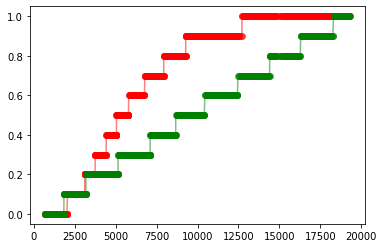

In [63]:
plt.plot(x_y, x_cdf, label='x', alpha=0.5, marker='o', color='red')
plt.plot(x_y, y_cdf, label='y', alpha=0.5, marker='o', color='green')
plt.show()

In [65]:
abs_diff_example = np.abs(np.subtract(x_cdf, y_cdf))
print(max(abs_diff_example))

0.4


In [68]:
def d_crit_two_way(arr1, arr2):
    return 1.36*np.sqrt(len(arr1)**-1 + len(arr2)**-1)

In [69]:
d_crit_two_way(df['Distance'].values, df['GenDistance'].values)

0.07300862528492258

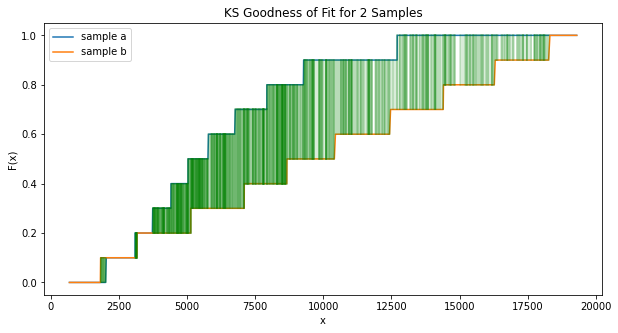

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(x_y, x_cdf, label='sample a')
plt.plot(x_y, y_cdf, label='sample b')

for val, p1, p2 in zip(x_y, x_cdf, y_cdf):
    plt.plot([val, val], [p1, p2], color='green', alpha=0.2)

plt.legend()
plt.ylabel("F(x)")
plt.xlabel('x')
plt.title("KS Goodness of Fit for 2 Samples")

plt.show()

### Омега

In [ ]:
# Реализовать критерий Андерсена-Дарлинга

### Шапиро-Уилка (Франча)

In [ ]:
#  Оценка не смещ.дисп. через порядковые статистики (оценка Ллойда) / поделить на дисперсию  (покажут отклонение от нормального)

# Статистическая Взаимосвязь

Шкалы и инструменты:

||номинальная|порядковая|интервальная|
|-|:-:|:-:|:-:|
|номинальная| не метрич.шкалы, отношения порядка нет| не метрич.шкалы, отношения порядка нет| |
|порядковая| не метрич.шкалы, отношения порядка нет| не метрич.шкалы, есть отношение порядка между значениями|не метрич.шкалы, есть отношение порядка между значениями |
|интервальная| | не метрич.шкалы, есть отношение порядка между значениями|не метрич.шкалы, есть отношение порядка между значениями |
    

### Корреляция Пирсона

In [15]:
# подходит для метрических шкал (только для линейных связей )
# r > 0 - прямая зависимость
# r < 0 - обратная зависимость
stats.pearsonr(df['Distance'].values, df['GenDistance'].values)

(0.925733500863096, 1.904501955942865e-294)

In [16]:
# p-value по пирсану
n = len(df['Distance'].values)
r = stats.pearsonr(df['Distance'].values, df['GenDistance'].values)[0]
dist = stats.beta(n/2 - 1, n/2 - 1, loc=-1, scale=2)
p = 2*dist.cdf(-abs(r))
p

1.904501955942865e-294

In [17]:
pr, p = stats.pearsonr(df['Distance'].values, df['GenDistance'].values)
print('Pearson r - ', pr, '| P-value - ', p)

Pearson r -  0.925733500863096 | P-value -  1.904501955942865e-294


### Коэф. ранговой корреляции (Спирман)

In [19]:
sp, p = stats.spearmanr(df['Distance'].values, df['GenDistance'].values)
print('Spearman r - ', sp, '| P-value - ', p)

Spearman r -  0.9999999281984621 | P-value -  0.0


### Коэф. порядковой корреляции (Кендалл тау)

In [23]:
ktau, p = stats.kendalltau(df['Distance'].values, df['GenDistance'].values)
print('Kendall Tau r - ', ktau, '| P-value - ', p)

Kendall Tau r -  0.9999833658392546 | P-value -  0.0


### Проверка значимости выборочных коэф.кор

In [25]:
# H0: p = 0, изменения не значительно, различие не значмое
# H1: различие значимое (p != 0)

# Шаги:
# 1 - узнать тип распределения коэф. кор. == нормальное распределение
# 2 - провести проеверку тестом Стьюдента (если p < 0 - то отрицательная взаимосвязь, если p > 0 - положительная взаимосвязь)

tstats, p_val = stats.ttest_ind(df['Distance'].values, df['GenDistance'].values)

if p_val > 0:
    print('Type - Positive', '|', ' P-value - ', p)
else:
    print('Type - Negative', '|', ' P-value - ', p)

Type - Positive |  P-value -  0.0


# Таблица сопряженности

1. строим выборку (репрезентативную)

2. строим таблицу сопряженности по категориям (i - индекс строки, j - индекс столбца)

|   | тип 1 | тип 2 | тип 3 | Всего | 
|:-:|:-----:|:-----:|:-----:|:-----:|
|кат 1 | 10%| 2%    | 1%    | 13%   |
|кат 2 | 8% | 3%    | 5%    | 16%   |
|кат 3 | 4% | 22%   | 45%   | 71%   |
| Всего | 22% | 27% | 51%   | 100%  |

3. Делаем вывод (если есть явное выделение группы, то смотрим на группу и пытаемся понять). Если нет выделяющихся признаков, то смотрим, какие-то ещё признаки

4. Если разница между группами не велика, то ищем распределение по ХИ-квадрату

|   | тип 1 | тип 2 | тип 3 | Всего | 
|:-:|:-----:|:-----:|:-----:|:-----:|
|кат 1 | 12%| 8%    | 15%   | 35%   |
|кат 2 | 8% | 8%    | 9%    | 25%   |
|кат 3 | 14% | 12%  | 14%   | 40%   |
| Всего | 24% | 28% | 39%   | 100%  |

In [ ]:
# 1. последовательно (определить, что с чем и для чего мы будем делать)
# 2. создать из последовательсноти гипотезы
# 3. определить тип гипотезы, данных, требования к критерию
# 3.1 рассчитываем кол-во степеней свободы = (r-1) * (c-1) | r-кол-во строк, c - кол-во столбцов

# 4. Применяем Xi2 для сводной таблицы (считается из ожидаемых значений и реальных)
# 4.1. Расчитываем ожидаемые (E) = (Mi * Mj) / N   (маргинал по столбцу и строке разделенные на объем выборки)

### Считаем E на примере таблицы


|   | тип 1 | тип 2 | тип 3 | Всего | 
|:-:|:-----:|:-----:|:-----:|:-----:|
|кат 1 | 10%| 2%    | 1%    | 13%   |
|кат 2 | 8% | 3%    | 5%    | 16%   |
|кат 3 | 4% | 22%   | 45%   | 71%   |
| Всего | 22% | 27% | 51%   | 100%  |

для первой ячейки, где 10%:
N11_E = (22 * 13) / 100 = 2,86

2,86 - это то, что мы ожидаем увидеть в данной клетке, но там 10

----------------------

Степени свободы:

df = (r-1)*(c-1) = (3-1) * (3-1) = 4

при этой степени свободы есть свои уровни значимости. При 4 pvalue =:

- для 0.05 = 9,49
- для 0.01 = 13,28
- для 0.001 = 18,47

------------------------------
**Хи2** - считаем по каждой клетки

((10 - 2.86)^2 / 2.86) + ((2 - 3.51)^2 / 3.51) + ((1 - 6.63)^2 / 6.63) + ... ((45 - 21)^2 / 36.21) = 1.852618853366964e-08

**Результат:** 1.852618853366964e-08 < p == True, так как p = 9,49

**Ответ:** значение много меньше, чем p, что говорит о том, что связи признаков нет


!NB: параметр показывает, только то, что есть зависимость. Но не дает объяснений(

In [27]:
import numpy as np
from scipy.stats import chi2_contingency

arr = np.array([[10, 2, 1],
                [8, 3, 5],
                [4, 22, 45]])
chi, pv, ddof, exp = chi2_contingency(arr)
pv, chi

(1.852618853366964e-08, 41.78023141361998)

In [28]:
exp

array([[ 2.86,  3.51,  6.63],
       [ 3.52,  4.32,  8.16],
       [15.62, 19.17, 36.21]])

### Крамер

Критерий для освобождения Хи2 от степеней свободы 

sqrt((chi2 / n) / (min((r-1)(c-1))))

In [32]:
# применим к выборке 
# n - это количество элементов
np.sqrt((chi / 100) / 2)

0.45705706106360494

**NB:** если ещё нет понимания, что визуализируем связь в данных

# Линейная регрессия

- Показывает функциональную взаимосвязь
- Помогает предсказывать значения
- Позволяет понять множественную взаимосвязь

**y = a + bx + e**

y - прогноз

a - свободный параметр

b - коэффициент регрессии (показывает наклон и силу фактора)

x - фактор

e - остатки, то, что не объяснется моделью (разброс)


### Примеры фичей для Линейной регрессии

1. Использовать стоит метрические(количественные)/ порядковые(ранговые) переменные
2. Идеальная переменная: интервальная (количестванная), без выбросов, нормально распределенная
3. Ещё дополнение: порядковая (только количественная) и с большим кол-вом порядков; где, можно расчитать больше-меньше (шкала от 1 до 9, имеет больше, меньше и среднее | но если взять группу, которая отображает какую-то группу, например, тип жилья, то считать меньше-больше нельзя)
4. Бинарные переменные ( но при хорошем распределении целевой по 1 и 0)
5. Проверить на корреляции
6. Категориальные переменные должны создаваться на 1 меньше, чем категорий (OHE) - проблема мультиколлинеарности

In [4]:
df_to_regressor = df.copy()
df_to_regressor.head(5)

,Distance,Class,GenDistance,Gender
0,693.187252,music,699,0
1,695.476117,math,704,1
2,808.722787,art,719,1
3,862.737524,music,783,1
4,894.073869,art,828,0


In [5]:
df_to_regressor['math'] = df_to_regressor['Class'].apply(lambda x: 1 if x == 'math' else 0)
df_to_regressor['art'] = df_to_regressor['Class'].apply(lambda x: 1 if x == 'art' else 0)

df_to_regressor['music'] = df_to_regressor['Class'].apply(lambda x: 1 if x == 'music' else 0)

Xs = df_to_regressor.drop(['Class', 'Distance'], axis = 1)
Y = df_to_regressor['Distance']

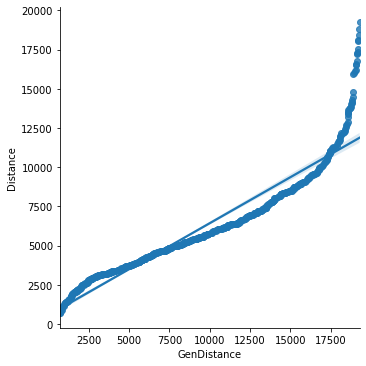

In [6]:
sns.lmplot(x='GenDistance',
           y='Distance',
           data=df_to_regressor);

<AxesSubplot:xlabel='GenDistance', ylabel='Distance'>

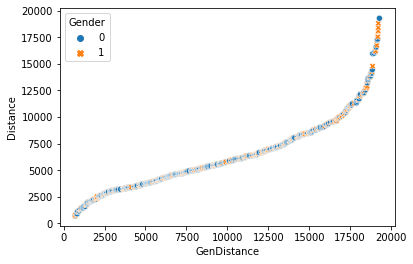

In [7]:
sns.scatterplot(data=df_to_regressor, x="GenDistance", y="Distance", hue="Gender",  style="Gender")

In [8]:
# пример много факторной регресси
from sklearn.linear_model import LinearRegression

#
# Учится на основе метода наименьших квадратов (min least square)
#
reg = LinearRegression().fit(Xs, Y)

# return R2
reg.score(Xs, Y)

0.8924064375260043

In [9]:
# коэффициенты для каждого столбца (b)
reg.coef_

array([   0.58413438,    8.30855676,  -48.4331613 , -123.84573285,
        172.27889415])

#### Качество модели

<AxesSubplot:ylabel='Distance'>

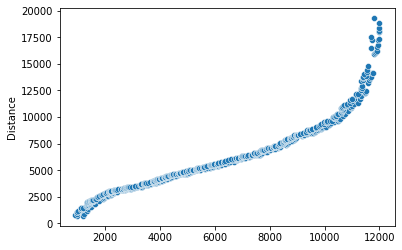

In [10]:
predict = reg.predict(Xs)

sns.scatterplot(x=predict, y=df_to_regressor["Distance"])

In [11]:
# общая дисперсия по предикту
TSS = sum((df_to_regressor["Distance"] - df_to_regressor["Distance"].mean())**2)

# Объясненная дисперсия
ESS = sum((predict - df_to_regressor["Distance"].mean())**2)

# сумма квадратов ошибки
RSS = sum((df_to_regressor["Distance"] - predict)**2)
TSS, ESS, RSS

(7715643990.041687, 6885490366.372032, 830153623.6696595)

In [12]:
# R2
r2_1 = 1 - (RSS/TSS)
r2_2 = ESS/TSS

# R2 - чем ближе к 1 тем лучше! Имеет значение от 0 до 1
round(r2_1,2), round(r2_2,2)

(0.89, 0.89)

In [13]:
# сравним скоринг по модели и ручной расчет
assert round(r2_1,2) == round(reg.score(Xs, Y),2)
assert round(r2_2,2) == round(reg.score(Xs, Y),2)

In [14]:
# корректируем коэф. R2
# формула = 1 - (1 - R2)*(n-1 / n-k)
r2_adj = 1 - (1-reg.score(Xs, Y))*(len(Y)-1)/(len(Y)-Xs.shape[1]-1)
r2_adj

0.8916245075661643

In [15]:
# должно быть меньше или равно R2
r2_adj <= reg.score(Xs, Y)

True

In [16]:
# сделаем расчте из библиотеки
import statsmodels.api as sm

X = sm.add_constant(Xs)
model = sm.OLS(Y, X).fit()

#скорректированный коэф. R2
print(model.rsquared_adj)

0.8917818014593919


In [17]:
# статистика по линейной модели (по статс.моделс) в параметре 'P>|t|'
X = sm.add_constant(Xs)
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1429.
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:00:11   Log-Likelihood:                -5840.9
No. Observations:                 694   AIC:                         1.169e+04
Df Residuals:                     689   BIC:                         1.171e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         443.5720     68.953      6.433      

### Проверка значимости параметров

Для регрессии проверка делается по Критерию Стьюдента

In [18]:
# в summary столбец 't'

# хорошие признаки из таблице, все, у которых маленькое значение 'P>|t|', меньше 0.05

In [19]:
# оставляем нужные признак
# удаляем Gender, math, music         

Xs_best = df_to_regressor.drop(['Class', 'Distance', 'Gender', 'math', 'music'], axis = 1)
Y = df_to_regressor['Distance']

reg = LinearRegression().fit(Xs_best, Y)

# return R2
reg.score(Xs_best, Y)

0.8916890034601099

In [20]:
# новая статистика
X = sm.add_constant(Xs_best)
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     2844.
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:00:11   Log-Likelihood:                -5843.2
No. Observations:                 694   AIC:                         1.169e+04
Df Residuals:                     691   BIC:                         1.171e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         651.0654     93.156      6.989      

### VIF

VIF = 1 / (1 - R2)

Поиск мультиколлинеарности

In [22]:
# VIF - фактор, который показывает степень проблемы с мультиколлинеарностью
# 1 - проблем нет
# >10 - выявляется мультиколлинеарность

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])], 
           index=Xs.columns)

GenDistance    1.016581
Gender         1.005153
math           2.352164
art            2.171709
music          2.348622
dtype: float64

In [28]:
# VIF из регрессии
def sklearn_vif(exogs, data):

    # словари данных
    vif_dict, tolerance_dict = {}, {}

    # поиск по данным
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # обучаем и получаем R2
        r_squared = LinearRegression().fit(X, y).score(X, y)
        
        # считаем VIF
        if r_squared != 1:
            vif = 1/(1 - r_squared)
            vif_dict[exog] = vif
        else:
            vif_dict[exog] = 0
            

        # расчет толиранц
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    return pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

sklearn_vif(exogs=Xs.columns, data=Xs)

,VIF,Tolerance
GenDistance,1.009512,0.990578
Gender,1.005153,0.994873
math,0.000000,0.000000
art,0.000000,0.000000
music,0.000000,0.000000


### Проверка предположений о модели

Работа с ошибкой `e`

In [48]:
# получим остатки resid = (fit - predict)
X = sm.add_constant(Xs_best)
est = sm.OLS(Y, X).fit()
resid = est.resid
resid

0      -366.502356
1      -367.136411
2       -79.258020
3      -246.057141
4       -57.626594
          ...     
689    6154.938279
690    6216.419756
691    6516.199435
692    6926.283607
693    7364.383032
Length: 694, dtype: float64

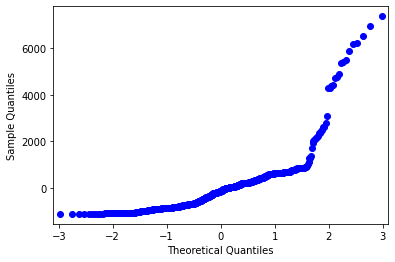

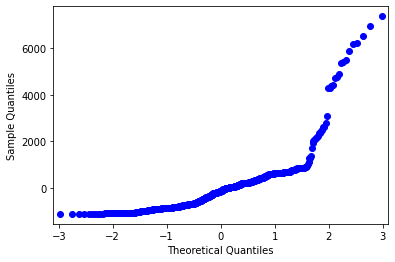

In [49]:
from statsmodels.graphics.gofplots import qqplot

qqplot(resid)

In [30]:
# проверка статистикой Андерсона-Дарлинга
from statsmodels.stats import diagnostic

In [50]:
ad2 = diagnostic.anderson_statistic(resid)
ad2

37.4686718796529

In [51]:
ad2, pvalue = diagnostic.normal_ad(resid)
pvalue

0.0

**Вывод по Андерсону - Дарлингу:**
    - статистика по АД > 37 и pvalue = 0.0, гипотеза о согласии с нормальным распределением отвергается

In [55]:
# Дарбина - Уотсона
from statsmodels.stats.stattools import durbin_watson

def dw(data):
    ols_res = sm.OLS(data, np.ones(len(data))).fit()
    return durbin_watson(ols_res.resid)

# если автокорреляции 0, то DW к 2
# если автокорреляции положительная, то DW к 0
# если автокорреляции отрицательная, то DW к 4

# получаем правильный результат
2 * (1 -dw(resid))

1.9683939170517946

**Вывод по Дарбину-Уотсона:**
    - статистика стримится к 2, что означает = автокорреляция равна 0

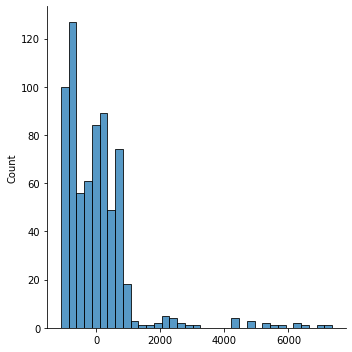

In [57]:
sns.displot(resid)